In [1]:
import numpy as np
import pandas as pd
# from shapely.geometry import Point, shape, LineString, mapping, MultiPoint
import seaborn
import geopandas as gpd
import pysal
import mapclassify
import matplotlib.pyplot as plt
from pysal.explore import esda
from pysal.lib import weights
import time
import random
import matplotlib.pyplot as plt
from shapely import wkt

from esda.moran import Moran
from libpysal.weights import Queen, KNN
import seaborn
import pandas
import geopandas
import numpy
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib_scalebar.scalebar import ScaleBar
from splot.esda import plot_local_autocorrelation
from esda.moran import Moran_Local_BV
from esda.moran import Moran_BV, Moran_Local_BV

from esda.moran import Moran, Moran_Local

from splot.esda import plot_moran_bv_simulation, plot_moran_bv
from splot.esda import moran_scatterplot


/Users/yuhan/opt/anaconda3/envs/hazard_env/lib/python3.11/site-packages/libpysal/cg/alpha_shapes.py:38: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
/Users/yuhan/opt/anaconda3/envs/hazard_env/lib/python3.11/site-packages/libpysal/cg/alpha_shapes.py:164: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
/Users/yuhan/opt/anaconda3/envs/hazard_env/lib/python

In [6]:
gdfjoined = gpd.read_file( r"exported_data/states_sheldus_all.shp")
gdfjoined = gpd.read_file( r"exported_data/states_sheldus_declared.shp")

gdfjoined2 = gdfjoined.to_crs({'init':'epsg:4326'})
gdfjoined2.crs

/Users/yuhan/opt/anaconda3/envs/hazard_env/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
gdfjoined2.head()

,STATE,STATEABBRV,COUNTY,COUNTYFIPS,STCOFIPS,POPULATION,BUILDVALUE,AGRIVALUE,SOVI_SCORE,RESL_VALUE,...,HAtotal,HAcount,PAcount,SBAcount,SBAProjcou,SBAapprove,HazardCoun,x,y,geometry
0,Alabama,AL,Autauga,001,01001,58764,9.123274e+09,24613998.0,51.299999,2.604995,...,7.687544e+06,4.0,0.0,44.0,6.0,1.160600e+06,6.0,-86.642759,32.534932,"POLYGON ((-86.41284 32.63589, -86.41279 32.625..."
1,Alabama,AL,Baldwin,003,01003,231365,4.596848e+10,138089013.0,31.030001,2.745075,...,9.947442e+08,34.0,0.0,1634.0,35.0,1.577607e+09,36.0,-87.723352,30.736470,"MULTIPOLYGON (((-87.92666 30.66002, -87.92688 ..."
2,Alabama,AL,Barbour,005,01005,25160,4.847697e+09,121075758.0,99.269997,2.383568,...,2.175617e+05,2.0,0.0,19.0,2.0,1.048000e+05,4.0,-85.393206,31.869615,"POLYGON ((-85.25954 32.13837, -85.25882 32.138..."
3,Alabama,AL,Bibb,007,01007,22239,3.146947e+09,4819356.0,80.779999,2.471525,...,2.454976e+07,4.0,0.0,55.0,4.0,4.280200e+06,4.0,-87.126450,32.998655,"POLYGON ((-87.02581 33.21717, -87.02573 33.209..."
4,Alabama,AL,Blount,009,01009,58992,7.815620e+09,278570859.0,51.369999,2.488382,...,5.337763e+07,4.0,0.0,65.0,7.0,1.391430e+07,7.0,-86.567381,33.980880,"POLYGON ((-86.44414 34.25913, -86.44434 34.256..."


In [10]:
print( gdfjoined2.columns )

Index(['STATE', 'STATEABBRV', 'COUNTY', 'COUNTYFIPS', 'STCOFIPS', 'POPULATION',
       'BUILDVALUE', 'AGRIVALUE', 'SOVI_SCORE', 'RESL_VALUE', 'fips', 'index',
       'HMAprojAmo', 'AdminCostA', 'NumfinalPr', 'CropDmg', 'CropDmg(AD',
       'CropDmgPer', 'PropertyDm', 'Property_1', 'Property_2', 'Injuries',
       'InjuriesPe', 'Fatalities', 'Fataliti_1', 'Duration_D', 'PAprojectA',
       'PDMprojAmo', 'PDMcount', 'PDMNumfina', 'HMAcount', 'HAtotal',
       'HAcount', 'PAcount', 'SBAcount', 'SBAProjcou', 'SBAapprove',
       'HazardCoun', 'x', 'y', 'geometry'],
      dtype='object')


In [12]:

#gdfjoined2['SBATotal'] = gdfjoined2['ApprovLo_1'] + gdfjoined2['ApprovLoan']
#gdfjoined2['HATotal'] = gdfjoined2['HAOAproved'] + gdfjoined2['HARAproved'] 


In [15]:
print( gdfjoined2.total_bounds )
xmin, ymin, xmax, ymax = [-125.78, 22.25, -65.62, 50.48]

[-124.7541084    24.52108866  -66.95000492   49.38435908]


In [ ]:
#print( xmin, ymin, xmax, ymax )
#gdfjoined2 = gdfjoined2.cx[xmin:xmax, ymin:ymax]

In [100]:
y1 = gdfjoined2[ 'HMAprojAmo' ].values
w1 = Queen.from_dataframe( gdfjoined2 )

w1.transform = 'r'
x1 = (gdfjoined2['Property_1'] ).values
moran1 = Moran(y1, w1)
moran_bv1 = Moran_BV(y1, x1, w1)
moran_loc1 = Moran_Local(y1, w1)
moran_loc_bv1 = Moran_Local_BV(y1, x1, w1)

#plot_local_autocorrelation(moran_loc_bv1, gdfjoined2, 'HMAprojAmo')
#plt.show()

/Users/yuhan/opt/anaconda3/envs/hazard_env/lib/python3.11/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
 There are 4 islands with ids: 1187, 1193, 1835, 2945.
  warnings.warn(message)


('WARNING: ', 1187, ' is an island (no neighbors)')
('WARNING: ', 1193, ' is an island (no neighbors)')
('WARNING: ', 1835, ' is an island (no neighbors)')
('WARNING: ', 2945, ' is an island (no neighbors)')


/Users/yuhan/opt/anaconda3/envs/hazard_env/lib/python3.11/site-packages/splot/_viz_esda_mpl.py:129: UserWarning: `p` is only used for plotting `esda.moran.Moran_Local`
or `Moran_Local_BV` objects
  warnings.warn('`p` is only used for plotting `esda.moran.Moran_Local`\n'
/Users/yuhan/opt/anaconda3/envs/hazard_env/lib/python3.11/site-packages/splot/_viz_esda_mpl.py:137: UserWarning: `p` is only used for plotting `esda.moran.Moran_Local`
or `Moran_Local_BV` objects
  warnings.warn('`p` is only used for plotting `esda.moran.Moran_Local`\n'


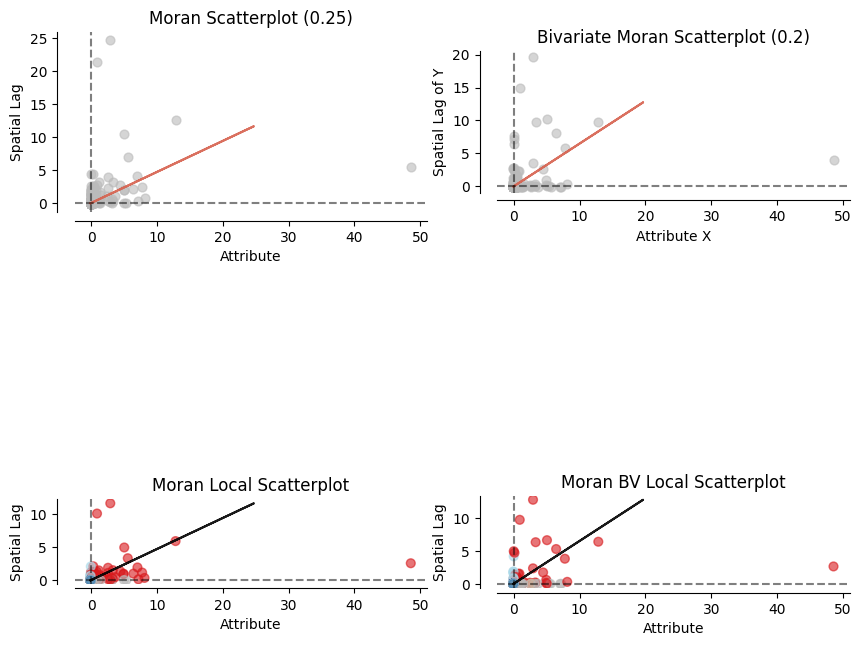

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(10,10),
                        subplot_kw={'aspect': 'equal'})
moran_scatterplot(moran1, p=0.05, ax=axs[0,0])
moran_scatterplot(moran_loc1, p=0.05, ax=axs[1,0])
moran_scatterplot(moran_bv1, p=0.05, ax=axs[0,1])
moran_scatterplot(moran_loc_bv1, p=0.05, ax=axs[1,1])
plt.show()


In [102]:
print( len( moran_loc_bv1.q ) )
print(  moran_loc_bv1.p_sim )
print( moran_loc_bv1.permutations )
gdfjoined2['HAMLossI'] = moran_loc_bv1.q

gdfjoined2['x'] = moran_loc_bv1.p_sim
gdfjoined2['HAMLossp2'] = moran_loc_bv1.p_sim

gdfjoined2.loc[ gdfjoined2['x'] < 0.05  ,'HAMLossp2'] = 1
gdfjoined2.loc[ gdfjoined2['x'] >= 0.05 ,'HAMLossp2'] = 0

gdfjoined2['HAMLossI'] = gdfjoined2['HAMLossI'] * gdfjoined2[ 'HAMLossp2' ]

#plt.hist(  moran_loc_bv1.p_sim )


3110
[0.291 0.01  0.015 ... 0.045 0.286 0.002]
999


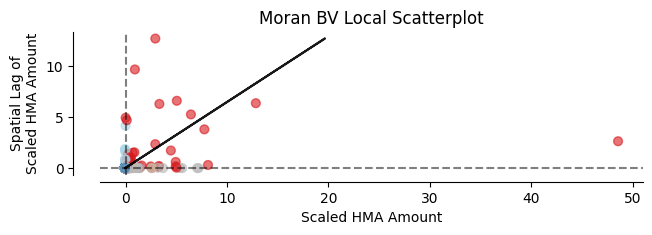

<Axes: title={'center': 'Moran BV Local Scatterplot'}, xlabel='Scaled HMA Amount', ylabel='Spatial Lag of\nScaled HMA Amount'>

In [42]:
fig, ax = moran_scatterplot(moran_loc_bv1, p=0.05)
ax.set_xlabel('Scaled HMA Amount')
ax.set_ylabel('Spatial Lag of\nScaled HMA Amount')
plt.show()



In [47]:
gdfjoined2.columns

Index(['index', 'STCOFIPS', 'State Name', 'STATEABBRV', 'County Nam',
       'HazardCoun', 'HMAprojAmo', 'HMApcount', 'HMAfedShaO', 'NumfinalPr',
       'duration_y', 'CropDmg', 'CropDmg(AD', 'CropDmgPer', 'PropertyDm',
       'HazardDama', 'Property_1', 'Property_2', 'Injuries', 'InjuriesPe',
       'Fatalities', 'Fataliti_1', 'Duration_D', 'Count_h', 'ApprovLoan',
       'Count_b', 'ApprovLo_1', 'HAOCount', 'HAOAproved', 'HARCount',
       'HARAproved', 'PAprojectA', 'PApcount', 'PAfedshare', 'PAtotobl',
       'NRI_ID', 'STATE', 'STATEABB_1', 'STATEFIPS', 'COUNTY', 'COUNTYTYPE',
       'COUNTYFIPS', 'POPULATION', 'BUILDVALUE', 'AGRIVALUE', 'AREA',
       'RISK_VALUE', 'RISK_SCORE', 'RISK_RATNG', 'RISK_SPCTL', 'EAL_SCORE',
       'EAL_RATNG', 'EAL_SPCTL', 'EAL_VALT', 'EAL_VALB', 'EAL_VALP',
       'EAL_VALPE', 'EAL_VALA', 'ALR_VALB', 'ALR_VALP', 'ALR_VALA',
       'ALR_NPCTL', 'SOVI_SCORE', 'SOVI_RATNG', 'SOVI_SPCTL', 'RESL_SCORE',
       'RESL_RATNG', 'RESL_SPCTL', 'RESL_VALUE', 'fi

In [103]:

y2 = (gdfjoined2['ApprovLoan'] + gdfjoined2['ApprovLo_1'] ).values
#w2 = Queen.from_dataframe( gdfjoined2 )

#w2.transform = 'r'
x2 = gdfjoined2[ 'Property_1' ].values 
moran2 = Moran(y2, w1)
moran_bv2 = Moran_BV(y2, x2, w1)
#moran_loc = Moran_Local(y2, w1)
moran_loc_bv2 = Moran_Local_BV(y2, x2, w1)

gdfjoined2['SBALossI'] = moran_loc_bv2.q

gdfjoined2['x'] = moran_loc_bv2.p_sim
gdfjoined2['SBALossp2'] = moran_loc_bv2.p_sim

gdfjoined2.loc[ gdfjoined2['x'] < 0.05  ,'SBALossp2'] = 1
gdfjoined2.loc[ gdfjoined2['x'] >= 0.05 ,'SBALossp2'] = 0

gdfjoined2['SBALossI'] = gdfjoined2['SBALossI'] * gdfjoined2[ 'SBALossp2' ]

In [104]:
y3 = (gdfjoined2['HAOAproved'] + gdfjoined2['HARAproved'] ).values 
#w3 = Queen.from_dataframe( gdfjoined2 )

#w3.transform = 'r'
x3 = gdfjoined2['Property_1'].values
moran3 = Moran(y3, w1)
moran_bv3 = Moran_BV(y3, x3, w1)
moran_loc_bv3 = Moran_Local_BV(y3, x3, w1)

gdfjoined2['HAOLossI'] = moran_loc_bv3.q

gdfjoined2['x'] = moran_loc_bv3.p_sim
gdfjoined2['HAOLossp2'] = moran_loc_bv3.p_sim

gdfjoined2.loc[ gdfjoined2['x'] < 0.05  ,'HAOLossp2'] = 1
gdfjoined2.loc[ gdfjoined2['x'] >= 0.05 ,'HAOLossp2'] = 0

gdfjoined2['HAOLossI'] = gdfjoined2['HAOLossI'] * gdfjoined2[ 'HAOLossp2' ]

In [106]:
y4 = ( gdfjoined2['PAprojectA'] ).values 
#w4 = Queen.from_dataframe( gdfjoined2 )

#w4.transform = 'r'
x4 = gdfjoined2['Property_1'].values
moran4 = Moran(y4, w1)
moran_bv4 = Moran_BV(y4, x4, w1)
moran_loc_bv4 = Moran_Local_BV(y4, x4, w1)

gdfjoined2['PALossI'] = moran_loc_bv4.q

gdfjoined2['x'] = moran_loc_bv4.p_sim
gdfjoined2['PALossp2'] = moran_loc_bv4.p_sim

gdfjoined2.loc[ gdfjoined2['x'] < 0.05  ,'PALossp2'] = 1
gdfjoined2.loc[ gdfjoined2['x'] >= 0.05 ,'PALossp2'] = 0

gdfjoined2['PALossI'] = gdfjoined2['PALossI'] * gdfjoined2[ 'PALossp2' ]

In [107]:
gdfjoined2['PDMprojAmo'] = gdfjoined2['PDMprojAmo'].fillna(0)
y5 = ( gdfjoined2['PDMprojAmo'] ).values
#w5 = Queen.from_dataframe( gdfjoined2 )

#w5.transform = 'r'
x5 = gdfjoined2['Property_1'].values 
moran5 = Moran(y5, w1)
moran_bv5 = Moran_BV(y5, x5, w1)
moran_loc_bv5 = Moran_Local_BV(y5, x5, w1)

gdfjoined2['PDMLossI'] = moran_loc_bv5.q

gdfjoined2['x'] = moran_loc_bv5.p_sim
gdfjoined2['PDMLossp2'] = moran_loc_bv5.p_sim

gdfjoined2.loc[ gdfjoined2['x'] < 0.05  ,'PDMLossp2'] = 1
gdfjoined2.loc[ gdfjoined2['x'] >= 0.05 ,'PDMLossp2'] = 0

gdfjoined2['PDMLossI'] = gdfjoined2['PDMLossI'] * gdfjoined2[ 'PDMLossp2' ]


In [49]:
gdfjoined2.columns

Index(['index', 'STCOFIPS', 'State Name', 'STATEABBRV', 'County Nam',
       'HazardCoun', 'HMAprojAmo', 'HMApcount', 'HMAfedShaO', 'NumfinalPr',
       'duration_y', 'CropDmg', 'CropDmg(AD', 'CropDmgPer', 'PropertyDm',
       'HazardDama', 'Property_1', 'Property_2', 'Injuries', 'InjuriesPe',
       'Fatalities', 'Fataliti_1', 'Duration_D', 'Count_h', 'ApprovLoan',
       'Count_b', 'ApprovLo_1', 'HAOCount', 'HAOAproved', 'HARCount',
       'HARAproved', 'PAprojectA', 'PApcount', 'PAfedshare', 'PAtotobl',
       'NRI_ID', 'STATE', 'STATEABB_1', 'STATEFIPS', 'COUNTY', 'COUNTYTYPE',
       'COUNTYFIPS', 'POPULATION', 'BUILDVALUE', 'AGRIVALUE', 'AREA',
       'RISK_VALUE', 'RISK_SCORE', 'RISK_RATNG', 'RISK_SPCTL', 'EAL_SCORE',
       'EAL_RATNG', 'EAL_SPCTL', 'EAL_VALT', 'EAL_VALB', 'EAL_VALP',
       'EAL_VALPE', 'EAL_VALA', 'ALR_VALB', 'ALR_VALP', 'ALR_VALA',
       'ALR_NPCTL', 'SOVI_SCORE', 'SOVI_RATNG', 'SOVI_SPCTL', 'RESL_SCORE',
       'RESL_RATNG', 'RESL_SPCTL', 'RESL_VALUE', 'fi

In [108]:

y12 = ( gdfjoined2['HMAprojAmo'] ).values
w12 = Queen.from_dataframe( gdfjoined2 )

w12.transform = 'r'
x12 = gdfjoined2['SOVI_SCORE'].values 
moran12 = Moran(y12, w12)
moran_bv12 = Moran_BV(y12, x12, w12)
moran_loc_bv12 = Moran_Local_BV(y12, x12, w12)

gdfjoined2['HMASVI'] = moran_loc_bv12.q

gdfjoined2['x'] = moran_loc_bv12.p_sim
gdfjoined2['HMASVIp2'] = moran_loc_bv12.p_sim

gdfjoined2.loc[ gdfjoined2['x'] < 0.05  ,'HMASVIp2'] = 1
gdfjoined2.loc[ gdfjoined2['x'] >= 0.05 ,'HMASVIp2'] = 0

gdfjoined2['HMASVI'] = gdfjoined2['HMASVI'] * gdfjoined2[ 'HMASVIp2' ]


/Users/yuhan/opt/anaconda3/envs/hazard_env/lib/python3.11/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
 There are 4 islands with ids: 1187, 1193, 1835, 2945.
  warnings.warn(message)


('WARNING: ', 1187, ' is an island (no neighbors)')
('WARNING: ', 1193, ' is an island (no neighbors)')
('WARNING: ', 1835, ' is an island (no neighbors)')
('WARNING: ', 2945, ' is an island (no neighbors)')


In [109]:
y22 = (gdfjoined2['ApprovLoan'] + gdfjoined2['ApprovLo_1'] ).values 
#w22 = Queen.from_dataframe( gdfjoined2 )

#w22.transform = 'r'
x22             = gdfjoined2[ 'SOVI_SCORE' ].values
moran22         = Moran(y22, w12)
moran_bv22      = Moran_BV(y22, x22, w12)
moran_loc_bv22  = Moran_Local_BV(y22, x22, w12)

gdfjoined2['SBASVI']    = moran_loc_bv22.q

gdfjoined2['x']         = moran_loc_bv22.p_sim
gdfjoined2['SBASVIp2']  = moran_loc_bv22.p_sim

gdfjoined2.loc[ gdfjoined2['x'] < 0.05  ,'SBASVIp2'] = 1
gdfjoined2.loc[ gdfjoined2['x'] >= 0.05 ,'SBASVIp2'] = 0

gdfjoined2['SBASVI'] = gdfjoined2['SBASVI'] * gdfjoined2[ 'SBASVIp2' ]


In [110]:
y32 = (gdfjoined2['HAOAproved'] + gdfjoined2['HARAproved'] ).values
#w32 = Queen.from_dataframe( gdfjoined2 )

#w32.transform = 'r'
x32 = gdfjoined2['SOVI_SCORE'].values 
moran32 = Moran(y32, w12)
moran_bv32 = Moran_BV(y32, x32, w12)
moran_loc_bv32 = Moran_Local_BV(y32, x32, w12)


gdfjoined2['HAOSVI'] = moran_loc_bv32.q

gdfjoined2['x'] = moran_loc_bv32.p_sim
gdfjoined2['HAOSVIp2'] = moran_loc_bv32.p_sim

gdfjoined2.loc[ gdfjoined2['x'] < 0.05  ,'HAOSVIp2'] = 1
gdfjoined2.loc[ gdfjoined2['x'] >= 0.05 ,'HAOSVIp2'] = 0

gdfjoined2['HAOSVI'] = gdfjoined2['HAOSVI'] * gdfjoined2[ 'HAOSVIp2' ]


In [111]:
y42 = ( gdfjoined2['PAprojectA'] ).values
#w42 = Queen.from_dataframe( gdfjoined2 )

#w42.transform = 'r'
x42 = gdfjoined2['SOVI_SCORE'].values 
moran42 = Moran(y42, w12)
moran_bv42 = Moran_BV(y42, x42, w12)
moran_loc_bv42 = Moran_Local_BV(y42, x42, w12)

gdfjoined2['PASVI'] = moran_loc_bv42.q


gdfjoined2['x'] = moran_loc_bv42.p_sim
gdfjoined2['PASVIp2'] = moran_loc_bv42.p_sim

gdfjoined2.loc[ gdfjoined2['x'] < 0.05  ,'PASVIp2'] = 1
gdfjoined2.loc[ gdfjoined2['x'] >= 0.05 ,'PASVIp2'] = 0

gdfjoined2['PASVI'] = gdfjoined2['PASVI'] * gdfjoined2[ 'PASVIp2' ]


In [112]:

y52 = ( gdfjoined2['PDMprojAmo'] ).values 
#w52 = Queen.from_dataframe( gdfjoined2 )

#w52.transform = 'r'
x52 = gdfjoined2['SOVI_SCORE'].values
moran52 = Moran(y52, w12)
moran_bv52 = Moran_BV(y52, x52, w12)
moran_loc_bv52 = Moran_Local_BV(y52, x52, w12)


gdfjoined2['PDMSVI'] = moran_loc_bv52.q


gdfjoined2['x'] = moran_loc_bv52.p_sim
gdfjoined2['PDMSVIp2'] = moran_loc_bv52.p_sim

gdfjoined2.loc[ gdfjoined2['x'] < 0.05  ,'PDMSVIp2'] = 1
gdfjoined2.loc[ gdfjoined2['x'] >= 0.05 ,'PDMSVIp2'] = 0

gdfjoined2['PDMSVI'] = gdfjoined2['PDMSVI'] * gdfjoined2[ 'PDMSVIp2' ]


In [113]:
gdfjoined2 = gpd.GeoDataFrame( gdfjoined2, geometry = 'geometry', crs="EPSG:4326")
gdfjoined2.to_file(r"/Users/yuhan/Desktop/paper——revision/export_results/df_localMoran.shp")



In [80]:
from splot.esda import lisa_cluster

moran_loc_bv4 = Moran_Local_BV(y4, x4, w1)

gdfjoined2['PALossI'] = moran_loc_bv3.q
gdfjoined2['PALossp'] = moran_loc_bv3.p_sim
gdfjoined2['PALossp2'] = moran_loc_bv3.p_sim

gdfjoined2.loc[ gdfjoined2['PALossp'] < 0.05 ,'PALossp2'] = 1
gdfjoined2.loc[ gdfjoined2['PALossp'] >= 0.05 ,'PALossp2'] = 0


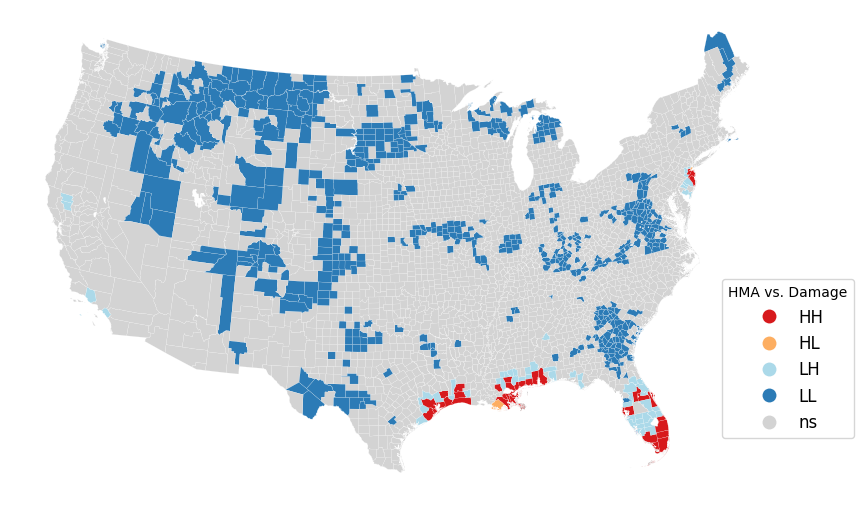

In [75]:

lisa_cluster(moran_loc_bv3, gdfjoined, p=0.05, 
             legend_kwds={'loc': 'lower right',  'title': "HMA vs. Damage", 
                                                                'bbox_to_anchor': (1.1, 0.1),
                                                                'fontsize':'large' },
                                                                 figsize=(10, 12), )
plt.show()


/Users/yuhan/opt/anaconda3/envs/hazard_env/lib/python3.11/site-packages/mapclassify/classifiers.py:1775: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 2.
  warnings.warn(


<Axes: >

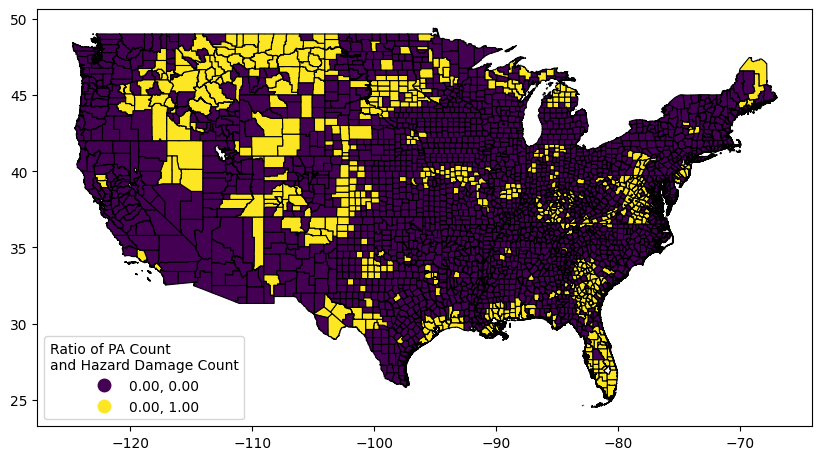

In [81]:
gdfjoined2.plot(
                column="PALossp2", scheme="NaturalBreaks",
                #cmap= 'RdYlGn_r',  
                legend=True,
                classification_kwds=dict(bins=[0, 1]),
                
                legend_kwds={"loc": "lower left", "fmt" : "{:.2f}" , 
                                'title': "Ratio of PA Count\nand Hazard Damage Count",
                                #"labels" : ["0.00", "0.0-6.0e3", "6.0e3-9.5e5", "9.5e3-2.2e7", "2.2e7-4e12"],
                                #"bbox_to_anchor": (1.0, 0.1),
                                'fontsize': 10
                            },
                linewidth=0.8,
                edgecolor='black',
                figsize=(10, 12) )


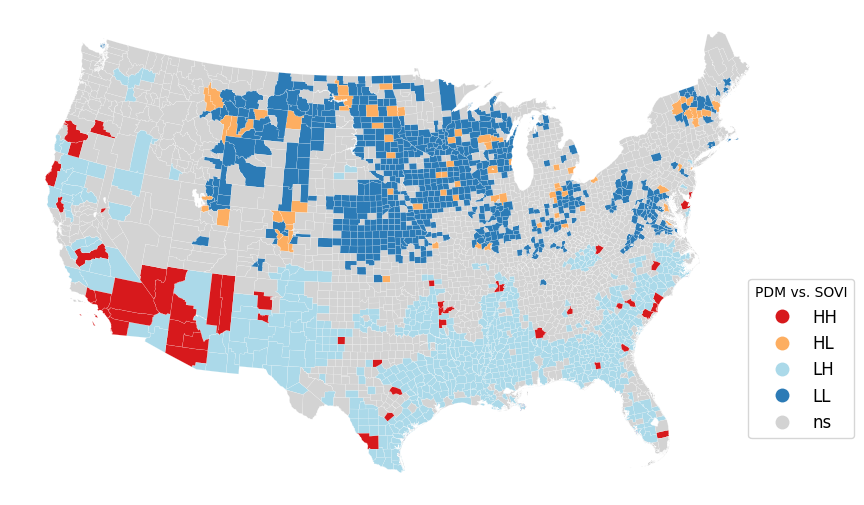

In [115]:

lisa_cluster(moran_loc_bv52, gdfjoined, p=0.05, 
             legend_kwds={'loc': 'lower right',  'title': "PDM vs. SOVI", 
                                                                'bbox_to_anchor': (1.1, 0.1),
                                                                'fontsize':'large' },
                                                                 figsize=(10, 12), )
plt.show()